### Extracción, Transformación y Carga de los datos de calidad de aire y salud

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px

c:\Users\hgera\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### Carguemos los datos 

In [2]:
base_path = 'data' + os.sep + 'raw'  

In [3]:
contaminantes = os.listdir(base_path)
contaminantes_path = [base_path + os.sep + contaminante for contaminante in contaminantes]
contaminantes_path

['data\\raw\\Dioxido_azufre',
 'data\\raw\\Dioxido_nitrogeno',
 'data\\raw\\Monoxido_carbono',
 'data\\raw\\Ozono',
 'data\\raw\\PM10',
 'data\\raw\\PM25']

In [4]:
data = {contaminantes[i]: {} for i in range(len(contaminantes))}
# print(data.items())
for i,contaminante_path in enumerate(contaminantes_path):
    archivos = os.listdir(contaminante_path)
    for archivo in archivos:
        if archivo.endswith('.xlsx'):
            estacion = archivo.split('.')[0]
            df =  pd.read_excel(contaminante_path + os.sep + archivo, engine='openpyxl')
            df.dropna(inplace=True, axis=0,ignore_index= True)
            # pd.to_datetime(df['Fecha'], dayfirst= False)
             #Unir fecha y hora en una nueva columna de tipo datetime
            hora = df['Hora'].str.split(" - ").str[1]
             
            df['Fecha'] = pd.to_datetime(
                df['Fecha'].astype(str) + " " +
                hora.astype(str)
            )
            
            data[contaminantes[i]][estacion] = df
            print('Cargando',contaminantes[i], archivo)    
            

Cargando Dioxido_azufre CDMX_CCA2023.xlsx
Cargando Dioxido_azufre CDMX_UAMI2023.xlsx
Cargando Dioxido_azufre NL_Cadereyta2024.xlsx
Cargando Dioxido_azufre NL_Juarez2024.xlsx
Cargando Dioxido_azufre NL_universidad2024.xlsx
Cargando Dioxido_nitrogeno CDMX_CCA2023.xlsx
Cargando Dioxido_nitrogeno CDMX_UAMI2023.xlsx
Cargando Dioxido_nitrogeno NL_Cadereyta2024.xlsx
Cargando Dioxido_nitrogeno NL_Juarez2024.xlsx
Cargando Dioxido_nitrogeno NL_universidad2024.xlsx
Cargando Monoxido_carbono CDMX_CCA2023.xlsx
Cargando Monoxido_carbono CDMX_UAMI2023.xlsx
Cargando Monoxido_carbono NL_Cadereyta2024.xlsx
Cargando Monoxido_carbono NL_Juarez2024.xlsx
Cargando Monoxido_carbono NL_universidad2024.xlsx
Cargando Ozono CDMX_CCA2023.xlsx
Cargando Ozono CDMX_UAMI2023.xlsx
Cargando Ozono NL_Cadereyta2024.xlsx
Cargando Ozono NL_Juarez2024.xlsx
Cargando Ozono NL_universidad2024.xlsx
Cargando PM10 CDMX_UAMI2023.xlsx
Cargando PM10 NL_Cadereyta2024.xlsx
Cargando PM10 NL_Juarez2024.xlsx
Cargando PM10 NL_universidad20

### Visualicemos por ejemplo algún archivo de PM 2.5

In [5]:
data.keys()

dict_keys(['Dioxido_azufre', 'Dioxido_nitrogeno', 'Monoxido_carbono', 'Ozono', 'PM10', 'PM25'])

In [6]:
data['PM25'].keys()

dict_keys(['CDMX_CCA2023', 'CDMX_UAMI2023', 'NL_Cadereyta2024', 'NL_Juarez2024', 'NL_universidad2024'])

In [7]:
data['PM25']['NL_universidad2024'].head(24)

,Parámetro,Fecha,Hora,Concentraciones horarias,Unidad
0,PM2.5,2024-01-01 02:00:00,1:00 - 2:00,418.0,µg/m³
1,PM2.5,2024-01-01 03:00:00,2:00 - 3:00,359.0,µg/m³
2,PM2.5,2024-01-01 04:00:00,3:00 - 4:00,186.0,µg/m³
3,PM2.5,2024-01-01 05:00:00,4:00 - 5:00,153.0,µg/m³
4,PM2.5,2024-01-01 06:00:00,5:00 - 6:00,104.0,µg/m³
5,PM2.5,2024-01-01 07:00:00,6:00 - 7:00,53.0,µg/m³
6,PM2.5,2024-01-01 08:00:00,7:00 - 8:00,70.0,µg/m³
7,PM2.5,2024-01-01 09:00:00,8:00 - 9:00,42.0,µg/m³
8,PM2.5,2024-01-01 10:00:00,9:00 - 10:00,26.0,µg/m³
9,PM2.5,2024-01-01 11:00:00,10:00 - 11:00,38.0,µg/m³


In [8]:
data['PM25']['NL_universidad2024'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7040 entries, 0 to 7039
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Parámetro                 7040 non-null   object        
 1   Fecha                     7040 non-null   datetime64[ns]
 2   Hora                      7040 non-null   object        
 3   Concentraciones horarias  7040 non-null   float64       
 4   Unidad                    7040 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 275.1+ KB


In [9]:
data['PM25']['NL_universidad2024'].describe()

,Fecha,Concentraciones horarias
count,7040,7040.000000
mean,2024-07-09 00:55:50.965909248,14.640341
min,2024-01-01 02:00:00,-9999.000000
25%,2024-04-03 22:15:00,11.000000
50%,2024-07-17 00:30:00,19.000000
75%,2024-10-11 01:15:00,29.000000
max,2025-01-01 23:00:00,418.000000
std,NaN,267.494060


Text(0.5, 1.0, 'PM 2.5 en NL_universidad2024')

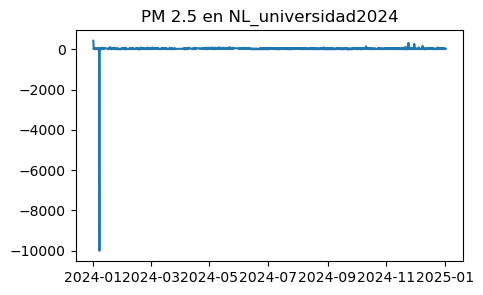

In [10]:
plt.figure(figsize=(5,3))
plt.plot(data['PM25']['NL_universidad2024']['Fecha'], data['PM25']['NL_universidad2024']['Concentraciones horarias'])
plt.title('PM 2.5 en NL_universidad2024')


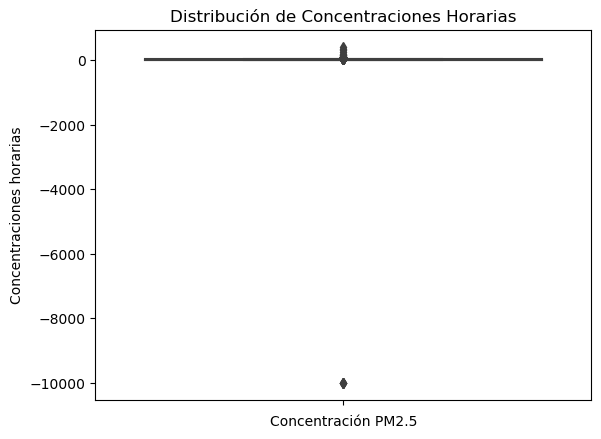

In [11]:
sns.boxplot(y=data['PM25']['NL_universidad2024']['Concentraciones horarias'])
plt.title("Distribución de Concentraciones Horarias")
plt.xlabel("Concentración PM2.5")
plt.show()


#### Notese como existe valores fuera de rango como -9999, quitemos los outliers.

In [12]:
df = data['PM25']['NL_universidad2024'].copy()

# Calcular los cuartiles y el IQR
Q1 = df['Concentraciones horarias'].quantile(0.25)
Q3 = df['Concentraciones horarias'].quantile(0.75)
IQR = Q3 - Q1
# Definir los límites para detectar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar outliers
outliers = df[(df['Concentraciones horarias'] < limite_inferior) | (df['Concentraciones horarias'] > limite_superior)]
print("Outliers detectados:\n", outliers['Concentraciones horarias'].count())   

# Filtrar y eliminar outliers
df_filtrado = df [(df['Concentraciones horarias'] >= limite_inferior) & (df['Concentraciones horarias'] <= limite_superior)]
print("\nDatos después de eliminar outliers:\n", df_filtrado['Concentraciones horarias'].count())

Outliers detectados:
 181

Datos después de eliminar outliers:
 6859


In [13]:
df_filtrado.head(24)

,Parámetro,Fecha,Hora,Concentraciones horarias,Unidad
5,PM2.5,2024-01-01 07:00:00,6:00 - 7:00,53.0,µg/m³
7,PM2.5,2024-01-01 09:00:00,8:00 - 9:00,42.0,µg/m³
8,PM2.5,2024-01-01 10:00:00,9:00 - 10:00,26.0,µg/m³
9,PM2.5,2024-01-01 11:00:00,10:00 - 11:00,38.0,µg/m³
10,PM2.5,2024-01-01 12:00:00,11:00 - 12:00,30.0,µg/m³
11,PM2.5,2024-01-01 13:00:00,12:00 - 13:00,19.0,µg/m³
12,PM2.5,2024-01-01 14:00:00,13:00 - 14:00,24.0,µg/m³
13,PM2.5,2024-01-01 15:00:00,14:00 - 15:00,7.0,µg/m³
14,PM2.5,2024-01-01 17:00:00,16:00 - 17:00,14.0,µg/m³
15,PM2.5,2024-01-01 18:00:00,17:00 - 18:00,9.0,µg/m³


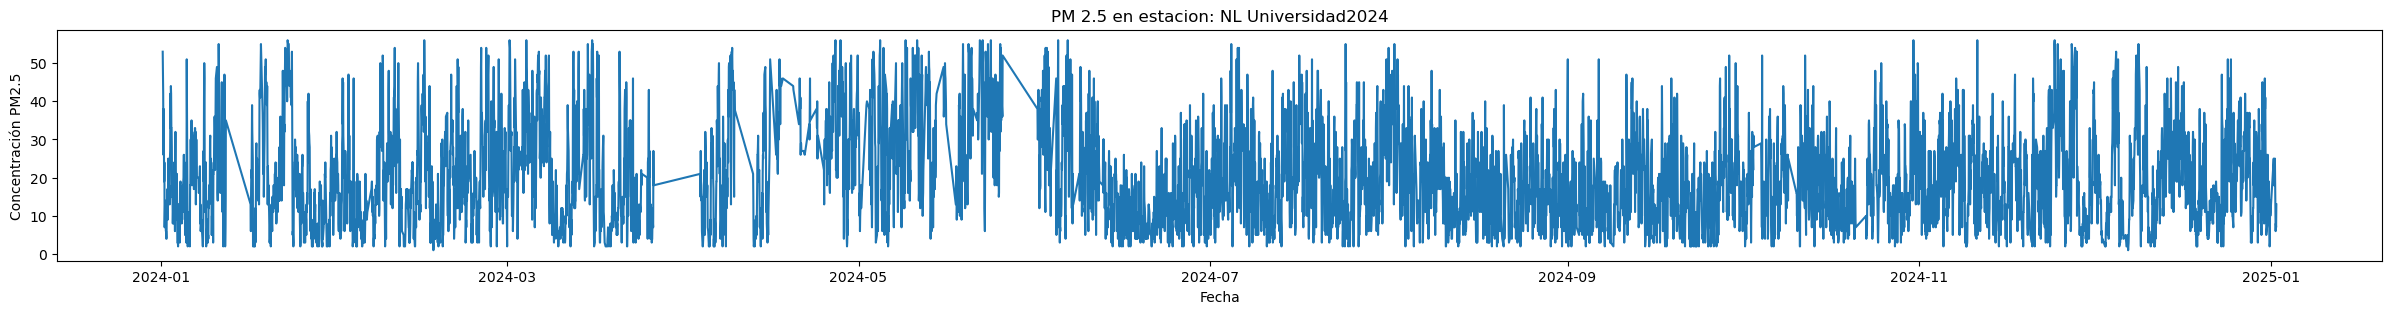

In [14]:
plt.figure(figsize=(30,3))
plt.plot(df_filtrado['Fecha'] , df_filtrado['Concentraciones horarias'])
plt.title('PM 2.5 en estacion: NL Universidad2024')
plt.xlabel('Fecha')
plt.ylabel('Concentración PM2.5')
plt.show()


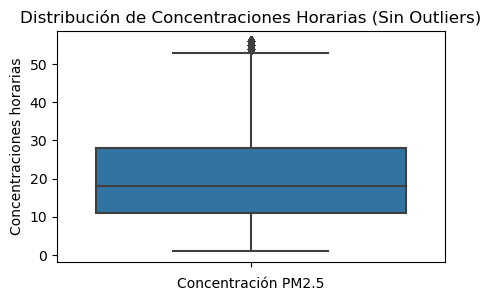

In [15]:
plt.figure(figsize=(5,3))
sns.boxplot(y=df_filtrado['Concentraciones horarias'])
plt.title("Distribución de Concentraciones Horarias (Sin Outliers)")
plt.xlabel("Concentración PM2.5")
plt.show()


#### Ahora limpiemos todos los datos de todas las estaciones 

In [16]:
data_clean = {}  # Diccionario para almacenar datos sin outliers

for data_contaminante in data.keys():
    
    data_clean[data_contaminante] = {}  # Crear clave para cada contaminante
    
    for estacion in data[data_contaminante].keys():
        df = data[data_contaminante][estacion].copy()

        # Calcular los cuartiles y el IQR
        Q1 = df['Concentraciones horarias'].quantile(0.25)
        Q3 = df['Concentraciones horarias'].quantile(0.75)
        IQR = Q3 - Q1

        # Definir los límites para detectar outliers
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        # Identificar outliers
        outliers = df[(df['Concentraciones horarias'] < limite_inferior) | (df['Concentraciones horarias'] > limite_superior)]
        print(f"{estacion} - {data_contaminante}")
        print("Outliers detectados:", outliers['Concentraciones horarias'].count())   

        # Filtrar y eliminar outliers
        df_filtrado = df[(df['Concentraciones horarias'] >= limite_inferior) & (df['Concentraciones horarias'] <= limite_superior)]
        print("Datos después de eliminar outliers:", df_filtrado['Concentraciones horarias'].count())
        print('---'*50)
        # Guardar en data_clean con la misma estructura
        data_clean[data_contaminante][estacion] = df_filtrado

print("\nProceso de limpieza completado.")


CDMX_CCA2023 - Dioxido_azufre
Outliers detectados: 355
Datos después de eliminar outliers: 5506
------------------------------------------------------------------------------------------------------------------------------------------------------
CDMX_UAMI2023 - Dioxido_azufre
Outliers detectados: 220
Datos después de eliminar outliers: 3158
------------------------------------------------------------------------------------------------------------------------------------------------------
NL_Cadereyta2024 - Dioxido_azufre
Outliers detectados: 1125
Datos después de eliminar outliers: 6901
------------------------------------------------------------------------------------------------------------------------------------------------------
NL_Juarez2024 - Dioxido_azufre
Outliers detectados: 657
Datos después de eliminar outliers: 7037
------------------------------------------------------------------------------------------------------------------------------------------------------
NL_un

#### Observemos de nuevo algún ejemplo de datos ya limpios

In [17]:
fig = px.line(
    data_clean['PM25']['CDMX_UAMI2023'], 
    x='Fecha', 
    y='Concentraciones horarias', 
    title='PM 2.5 en CDMX estación UAMI2023',
    labels={'Fecha': 'Fecha y Hora', 'Concentraciones horarias': 'PM2.5 (µg/m³)'},  # Etiquetas personalizadas
    line_shape='vh',  
    markers=True,  # Puntos en la línea
    color_discrete_sequence=['black'],  # Color de la línea
)

# Personalización adicional
fig.update_layout(
    xaxis_title="Fecha y Hora",
    yaxis_title="Concentración de PM2.5 (µg/m³)",
    xaxis_tickangle=-45,  # Rotar etiquetas del eje X
    template= 'seaborn',  # Estilo oscuro
)

fig.show()


c:\Users\hgera\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


### Filtremos por mes

In [18]:
# Filtrar los datos para cualquier mes
numero_mes = 9
data_por_mes = data_clean['PM25']['CDMX_UAMI2023'][data_clean['PM25']['CDMX_UAMI2023']['Fecha'].dt.month == numero_mes]
# Generar el gráfico
fig = px.line(
    data_por_mes, 
    x='Fecha', 
    y='Concentraciones horarias', 
    title='PM 2.5 en CDMX estación UAMI2023 ',
    labels={'Fecha': 'Fecha y Hora', 'Concentraciones horarias': 'PM2.5 (µg/m³)'},
    line_shape='vh',  # Considera cambiar a 'linear' o 'spline' para una línea más suave
    markers=True,  # Puntos en la línea
    color_discrete_sequence=['black'],  # Color de la línea
)

# Actualización de la línea
fig.update_traces(
    marker=dict(size=5),  # Tamaño de los marcadores
    line=dict(dash='solid', width=2)  # Línea sólida, ancho de 2
)

# Personalización adicional con opacidad para la figura entera
fig.update_layout(
    xaxis_title="Fecha y Hora",
    yaxis_title="Concentración de PM2.5 (µg/m³)",
    xaxis_tickangle=-45,  # Rotar etiquetas del eje X
    template='seaborn',  # Estilo de la plantilla
)

fig.show()

c:\Users\hgera\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



#### Hay un problema, hay valores que no fueron registrados por las estaciones, ya sea por que estuviera en mantenimiento o alguna otra situación, rellenemos con ceros para aquellas horas en las que no hay valores

In [19]:
data_clean['PM25']['CDMX_UAMI2023'].head()  #### Por ejemplo aqui, se hace un salto de las 00:00 a las 14:00

,Parámetro,Fecha,Hora,Concentraciones horarias,Unidad
0,PM2.5,2023-01-01 00:00:00,23:00 - 0:00,39.0,µg/m³
14,PM2.5,2023-01-01 14:00:00,13:00 - 14:00,34.0,µg/m³
15,PM2.5,2023-01-01 15:00:00,14:00 - 15:00,17.0,µg/m³
16,PM2.5,2023-01-01 16:00:00,15:00 - 16:00,7.0,µg/m³
17,PM2.5,2023-01-01 17:00:00,16:00 - 17:00,7.0,µg/m³


In [20]:

for data_contaminante in data_clean.keys():
    for estacion in data_clean[data_contaminante].keys():

        data_clean[data_contaminante][estacion]['Fecha'] = pd.to_datetime(data_clean[data_contaminante][estacion]['Fecha'])

        # Crear un rango de fechas que abarque todas las fechas presentes en tu dataframe con frecuencia de 1 hora
        rango_fechas = pd.date_range(start=data_clean[data_contaminante][estacion]['Fecha'].min(), 
                                    end=data_clean[data_contaminante][estacion]['Fecha'].max(), freq='h')

        # Reindexar el dataframe para que coincida con el rango completo de fechas y llenar los valores faltantes con ceros
        data_clean[data_contaminante][estacion] = data_clean[data_contaminante][estacion].set_index('Fecha').reindex(rango_fechas, fill_value=0)

        # Si es necesario, puedes resetear el índice para que la columna 'Fecha' vuelva a estar como columna
        data_clean[data_contaminante][estacion] = data_clean[data_contaminante][estacion].reset_index()

        # Renombrar la columna de índice a 'Fecha'
        data_clean[data_contaminante][estacion] = data_clean[data_contaminante][estacion].rename(columns={'index': 'Fecha'})



C:\Users\hgera\AppData\Local\Temp\ipykernel_9940\1359634408.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [21]:
data_clean['PM25']['CDMX_UAMI2023'].head(24) 

,Fecha,Parámetro,Hora,Concentraciones horarias,Unidad
0,2023-01-01 00:00:00,PM2.5,23:00 - 0:00,39.0,µg/m³
1,2023-01-01 01:00:00,0,0,0.0,0
2,2023-01-01 02:00:00,0,0,0.0,0
3,2023-01-01 03:00:00,0,0,0.0,0
4,2023-01-01 04:00:00,0,0,0.0,0
5,2023-01-01 05:00:00,0,0,0.0,0
6,2023-01-01 06:00:00,0,0,0.0,0
7,2023-01-01 07:00:00,0,0,0.0,0
8,2023-01-01 08:00:00,0,0,0.0,0
9,2023-01-01 09:00:00,0,0,0.0,0


### Cree una funcion en la carpeta modules para visualizar los datos por contaminante, mes y estacion.

In [22]:
from modules.dynamic_graph import generar_grafico

In [23]:
generar_grafico(data_clean, 'O3', 'CDMX_UAMI2023',9)


c:\Users\hgera\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



### Listo eso sería el preprocesamiento para nuestros datos. :)
### Guardemoslos

In [24]:
import pickle

# Guardar el objeto data_clean en un archivo pickle
with open('data' + os.sep + 'data.pkl', 'wb') as f:
    pickle.dump(data_clean, f)

print("Objeto guardado correctamente")

Objeto guardado correctamente


### Ejemplo de como cargarlo

In [25]:
# Cargar el objeto data_clean desde el archivo pickle
with open('data' + os.sep + 'data.pkl', 'rb') as f:
    loaded_data = pickle.load(f)

print("Objeto cargado correctamente")

Objeto cargado correctamente


### Ya se puede usar directamente

In [37]:
generar_grafico(loaded_data, 'SO2', 'NL_Cadereyta2024',12)

c:\Users\hgera\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [36]:
generar_grafico(loaded_data, 'SO2', 'NL_universidad2024',12)

c:\Users\hgera\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

